In [1]:
from matplotlib.colors import LogNorm
from numpy import pi, cos, sin, linspace, meshgrid, zeros, sqrt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.integrate as integrate

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Superposition-of-Electric-Fields" data-toc-modified-id="Superposition-of-Electric-Fields-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Superposition of Electric Fields</a></span></li><li><span><a href="#Induced-Magnetic-Fields" data-toc-modified-id="Induced-Magnetic-Fields-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Induced Magnetic Fields</a></span></li><li><span><a href="#Path-of-a-Point-Charge" data-toc-modified-id="Path-of-a-Point-Charge-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Path of a Point Charge</a></span></li><li><span><a href="#Propagation-of-Gaussian-Electromagnetic-Waves" data-toc-modified-id="Propagation-of-Gaussian-Electromagnetic-Waves-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Propagation of Gaussian Electromagnetic Waves</a></span></li><li><span><a href="#Reflection-Interference-of-Electromagnetic-Waves" data-toc-modified-id="Reflection-Interference-of-Electromagnetic-Waves-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reflection Interference of Electromagnetic Waves</a></span></li></ul></div>

## Superposition of Electric Fields

Produce plots of the electric field of four point charges: two positive $(+q_o )$ located at $\vec{r}_{1,2} = \pm a\hat{z}$ and two negative $(−q_o )$ located at $\vec{r} 3,4 = \pm a\hat{x}$. You can use either a stream plot or a vector plot to indicate the direction of the electric field, but the magnitude of the electric field should be plotted as a density plot (or a 2D histogram). Note: The analytical expression for the field should be determined on paper, and is trivially easy.

In [9]:
#Calculating the electric field


def E_field(x, z):
    dom1 = (x**2 + (z - 1)**2)**(1.5)
    dom2 = (x**2 + (z + 1)**2)**(1.5)
    dom3 = (z**2 + (x - 1)**2)**(1.5)
    dom4 = (z**2 + (x + 1)**2)**(1.5)

    E_x = x / dom1 + x / dom2 - (x - 1) / dom3 - (x + 1) / dom4
    E_z = (z - 1) / dom1 + (z + 1) / dom2 - z / dom3 - z / dom4

    return [E_x, E_z]  #q_o/(4 pi epsilon_o a**2)


# end def

N = 2
dn = 1000
z = np.linspace(-N, N, dn)
x = np.linspace(-N, N, dn)

w = 2
res = 650j
Z, X = np.mgrid[-w:w:res, -w:w:res]

E_vec = E_field(X, Z)

E_mag = (E_vec[0]**2 + E_vec[1]**2)**0.5

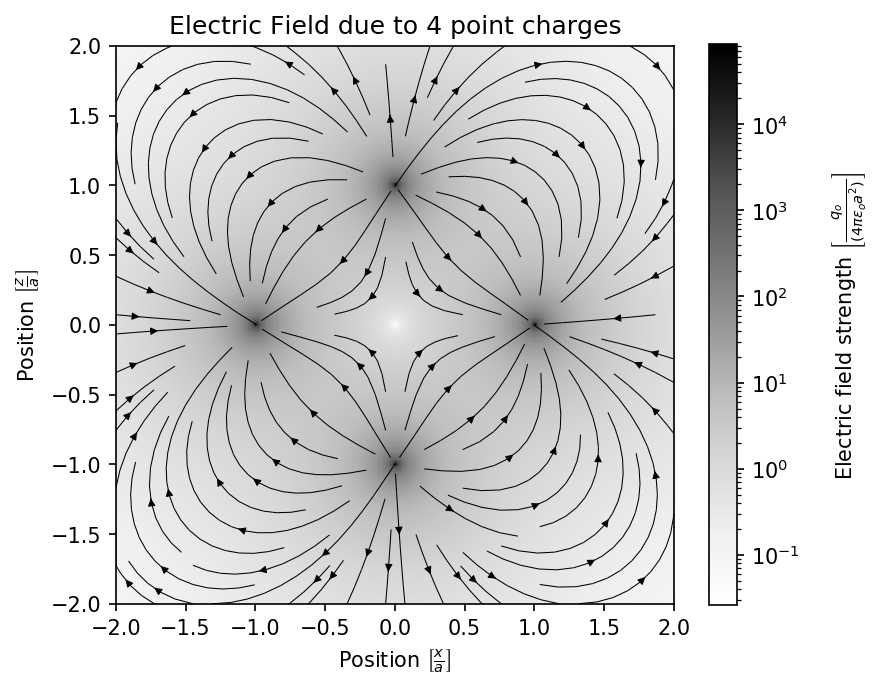

In [10]:
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(6, 6))
k = plt.imshow(E_mag, extent=(-2, 2, -2, 2), cmap='Greys', norm=LogNorm())
plt.streamplot(X,
               Z,
               E_vec[0],
               E_vec[1],
               linewidth=0.5,
               arrowsize=0.75,
               density=1,
               color='k')
cbar = plt.colorbar(k, shrink=0.825)
clab = r"Electric field strength $\left[\frac{q_o}{(4 \pi \epsilon_o a^2)}\right]$"
cbar.set_label(clab, rotation=90, labelpad=15)

plt.xlim(-w, w)
plt.ylim(-w, w)
plt.ylabel(r"Position $\left[\frac{z}{a}\right]$")
plt.xlabel(r"Position $\left[\frac{x}{a}\right]$")
plt.title('Electric Field due to 4 point charges')
plt.show()

## Induced Magnetic Fields

A circular loop of wire of radius $R = 10$cm with central axis along $\hat{z}$ carries a current I. A second circular loop of wire with radius $r = 5$cm is centred at a point along the $\hat{z}$ axis, 12cm away from the larger loop, and initially parallel to the larger loop.

a) Produce a vector/stream plot of the magnetic field around the larger circular wire in the $\hat{s} - \hat{z}$ plane.

In [14]:
#Calculating the magnetic field
r = 0.1  # m


def Bx(t, x, z):
    denom = ((x - r * cos(t))**2 + (-r * sin(t))**2 + (z)**2)**(3 / 2)
    return r * z * cos(t) / denom


def Bz(t, x, z):
    denom = ((x - r * cos(t))**2 + (-r * sin(t))**2 + (z)**2)**(3 / 2)
    return r * (r - x * cos(t)) / denom


def B_field(x, z):
    B_x = integrate.quad(Bx, 0, 2 * pi, args=(x, z))[0]
    B_z = integrate.quad(Bz, 0, 2 * pi, args=(x, z))[0]
    return [B_x, B_z]  #


size = 200
l = 0.5
dir_space = linspace(-l, l, size)

X, Z = meshgrid(dir_space, dir_space)

B_mag = zeros([size, size])

B_x = zeros([size, size])
B_z = zeros([size, size])

# finds all the component values at each pt in the grid.
for i in range(0, len(X)):
    for j in range(0, len(Z)):
        B = B_field(X[i, j], Z[i, j])
        bx = B[0]
        bz = B[1]
        B_x[i, j] = bx
        B_z[i, j] = bz
        B_mag[i, j] = sqrt(bx**2 + bz**2)
    # end for
# end for

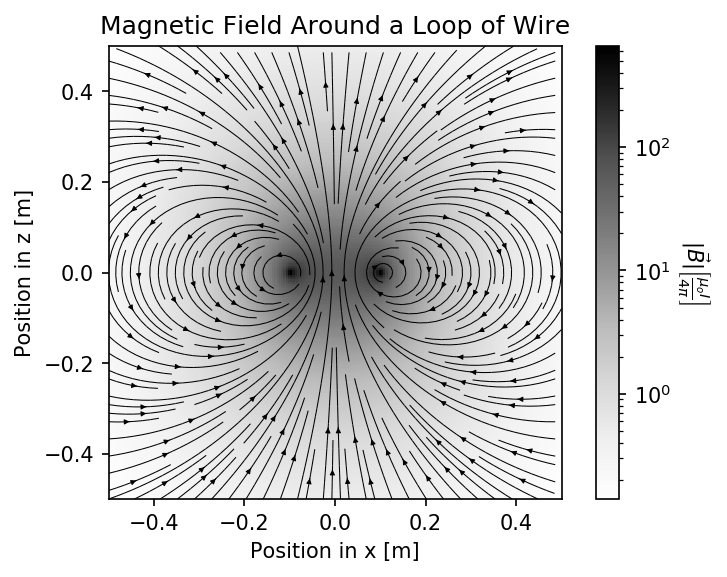

In [15]:
plt.figure()
k = plt.imshow(B_mag, extent=(-l, l, -l, l), cmap='Greys', norm=LogNorm())
plt.streamplot(X,
               Z,
               B_x,
               B_z,
               density=1.8,
               linewidth=0.5,
               arrowsize=0.5,
               color='k')
WhatIsSamTomkinsFavouritePlace = plt.colorbar(k)
label = r'$|\vec{B}| \left[ \frac{\mu_o I}{4 \pi} \right]$'
WhatIsSamTomkinsFavouritePlace.set_label(label, rotation=270, labelpad=20)
plt.xlabel('Position in x [m]')
plt.ylabel('Position in z [m]')
plt.xlim(-l, l)
plt.ylim(-l, l)
plt.title("Magnetic Field Around a Loop of Wire")
plt.show()

b) Assuming the smaller loop of wire is rotating about about its centroid in the $\hat{x}$ axis, solve for the induced current as a function of time in the smaller loop.

In [16]:
# Leave out the mu_o and I, ie is one
z_o = 0.12  #m
R = 0.10  #m
r_o = 0.05  #m

#find the Flux for each angle theta (-\pi to \pi)
fullrot = linspace(0, 2 * pi, 100)
Flux = []
for theta in fullrot:
    dFlux = lambda s_pp, phi_pp, phi_p: R * s_pp * (
        (z_o - s_pp * sin(phi_pp) * sin(theta)) * sin(phi_p) * sin(theta) - (
            (s_pp * cos(phi_pp) - R * cos(phi_p)) * cos(phi_p) +
            (s_pp * sin(phi_pp) * cos(theta) - R * sin(phi_p)) * sin(phi_p)) *
        cos(theta)) / ((s_pp * cos(phi_pp) - R * cos(phi_p))**2 +
                       (s_pp * sin(phi_pp) * cos(theta) - R * sin(phi_p))**2 +
                       (z_o - s_pp * sin(phi_pp) * sin(theta))**2)**(1.5)
    Flux.append(
        integrate.tplquad(dFlux, 0, 2 * pi, lambda phi_p: 0,
                          lambda phi_p: 2 * pi, lambda phi_p, phi_pp: 0,
                          lambda phi_p, phi_pp: r_o)[0])
# end for

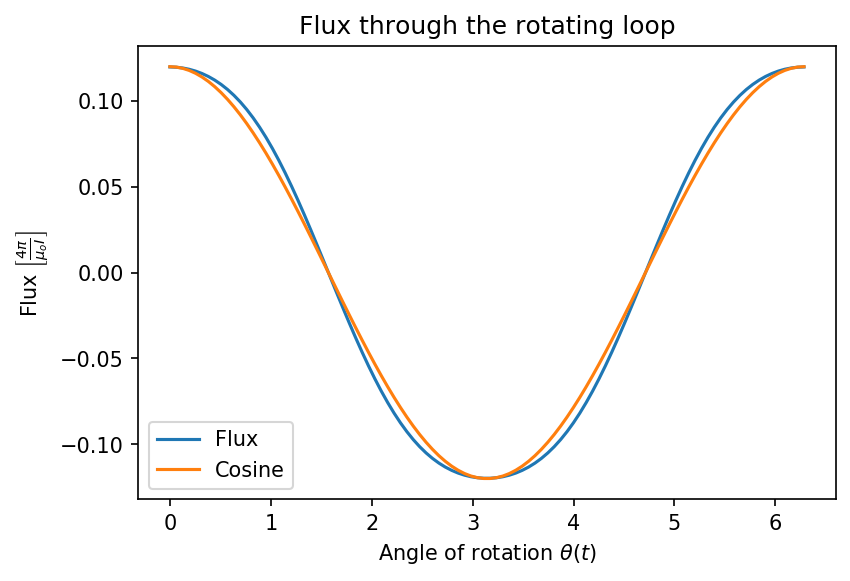

In [17]:
plt.figure()
plt.plot(fullrot, Flux, label='Flux')
plt.plot(fullrot, 0.12 * cos(fullrot), label='Cosine')
plt.title('Flux through the rotating loop')
plt.ylabel(r'Flux $\left[\frac{4\pi}{\mu_o I}\right]$')
plt.xlabel(r'Angle of rotation $\theta(t)$')
plt.legend()
plt.show()

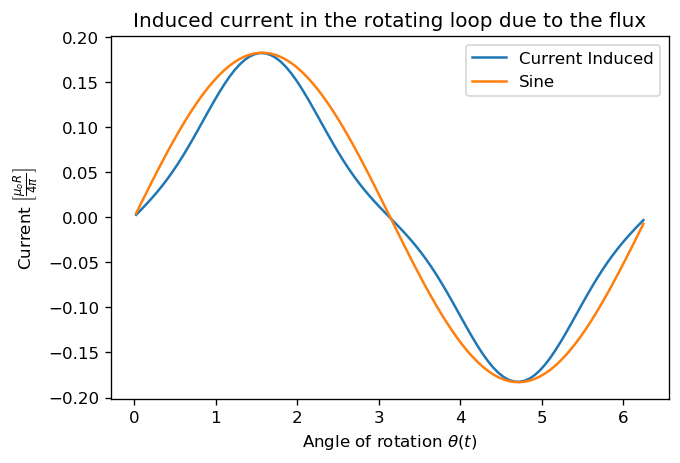

In [18]:
#Find current: Finite difference method
Current = -np.diff(Flux) / r_o
delta_t = fullrot[0:-1] + r_o / 2
plt.rcParams['figure.dpi']= 120
plt.figure()
plt.plot(delta_t, Current, label='Current Induced')
plt.plot(delta_t, 0.183 * sin(delta_t), label='Sine')
plt.title('Induced current in the rotating loop due to the flux')
plt.xlabel(r'Angle of rotation $\theta(t)$')
plt.ylabel(r'Current $\left[\frac{\mu_o R}{4\pi}\right]$')
plt.legend()
plt.show()

## Path of a Point Charge

A point charge follows the path $w(t)= v_0 t \hat{z} + x_0 sin(\omega t)\hat{x}$. Produce ten plots of the electric and magnetic field in the $\hat{x} - \hat{z}$ plane between $t = 0$ to $t = 2\pi/\omega$. Note: You will need to use root solving to find the retarded location of the charge for every single $x - z$ point on your plot.

In [20]:
c = 1
v0 = 0.1 * c
omega = 0.5  # I choose!
x0 = v0 / omega


# path in xyz
def w(t):
    return np.array([x0 * np.sin(omega * t), 0, v0 * t])


# end def


# velocity in xyz
def v(t):
    return np.array([omega * x0 * np.cos(omega * t), 0, v0])


# end def


# acceleration in xyz
def a(t):
    return np.array([-omega**2 * x0 * np.sin(omega * t), 0, 0])


# end def

In [21]:
# Newtons Method
def NewtonsMeth(func, deri, guess, toll, maxlo=20):
    root = np.zeros(maxlo)
    root[0] = guess
    # uses a guess to try and locate the root of the function
    for a in range(1, maxlo):
        root[a] = root[a - 1] - func(root[a - 1]) / deri(root[a - 1])
        if (root[a] - root[a - 1]) <= toll:
            return root[a]
        # end if
    # end for


# end def

In [22]:
# calculates E&B
def EBfields(x, y, z, t):
    # retarded time & derivative
    are = np.array([x, y, z])
    retard = lambda tr: tr - t + (1 / c) * np.sqrt((are[0] - w(tr)[0])**2 +
                                                   (are[1] - w(tr)[1])**2 +
                                                   (are[2] - w(tr)[2])**2)
    der_retard = lambda tr: 1 - (1 / c) * (
        (are[0] - w(tr)[0]) * v(tr)[0] + (are[1] - w(tr)[1]) * v(tr)[1] +
        (are[2] - w(tr)[2]) * v(tr)[2]) / np.sqrt((are[0] - w(tr)[0])**2 +
                                                  (are[1] - w(tr)[1])**2 +
                                                  (are[2] - w(tr)[2])**2)

    # finds the roots to get retarded time
    tr = NewtonsMeth(retard, der_retard, t, 1e-10)

    # curly r equation, magnitude, unit vector
    carl = are - w(tr)
    Mcarl = np.sqrt(carl[0]**2 + carl[1]**2 + carl[2]**2)
    Ucarl = carl / Mcarl

    # alpha & beta
    beta = v(tr) / c
    Mbeta = np.sqrt(beta[0]**2 + beta[1]**2 + beta[2]**2)
    alpha = Ucarl - beta

    # E & B
    E = (Mcarl /
         (carl[0] * alpha[0] + carl[1] * alpha[1] + carl[2] * alpha[2])**3) * (
             (1 - Mbeta**2) * alpha + (1 / c) *
             (np.cross(carl, np.cross(alpha, a(tr)))))
    B = np.cross(Ucarl, E)

    return E, B


# end def

In [23]:
# this function will find EB then plot them!
def xzField(t, num):
    siz = 100
    l = 2
    xx = np.linspace(-l, l, siz)
    X, Z = np.meshgrid(xx, xx)
    y = 0

    # order the grid
    GP = np.dstack((X, Z))

    # E&B components, magnitudes, unit vectors
    ex = np.empty(X.shape)
    ey = np.empty(X.shape)
    ez = np.empty(X.shape)
    bx = np.empty(X.shape)
    by = np.empty(X.shape)
    bz = np.empty(X.shape)
    Me = np.empty(X.shape)
    Mb = np.empty(X.shape)
    #Uex = np.empty(X.shape); Uey = np.empty(X.shape); Uez = np.empty(X.shape)

    # filling
    for a, rows in enumerate(GP):
        for b, ee in enumerate(GP[a]):

            thisP = EBfields(ee[0], y, ee[1], t)

            ex[a, b] = thisP[0][0]
            ey[a, b] = thisP[0][1]
            ez[a, b] = thisP[0][2]
            bx[a, b] = thisP[1][0]
            by[a, b] = thisP[1][1]
            bz[a, b] = thisP[1][2]

            Me[a, b] = np.sqrt(ex[a, b]**2 + ey[a, b]**2 + ez[a, b]**2)

            Mb[a, b] = np.sqrt(bx[a, b]**2 + by[a, b]**2 + bz[a, b]**2)

            #Uex[a,b] = ex[a,b]/Me[a,b]; Uey[a, b] = ey[a,b]/Me[a,b]; Uez[a,b] = ez[a,b]/Me[a,b]
        # end for
    # end for

    # make the plots
    figure, axes = plt.subplots(1, 2, figsize=(24, 8))

    # electric field direction & magnitude plot
    edir = axes[0].streamplot(X,
                              Z,
                              ex,
                              ez,
                              color='k',
                              linewidth=0.7,
                              density=0.6,
                              minlength=0.25,
                              arrowsize=1)
    emag = axes[0].pcolor(X, Z, Me)
    emag.norm = colors.LogNorm(vmin=0.1, vmax=100)
    emag.cmap = plt.cm.get_cmap('Greys')
    ecbar = figure.colorbar(emag, ax=axes[0], extend='both')
    eclab = r"Electric field strength $\left[\frac{q_o}{(4 \pi \epsilon_o a^2)}\right]$"
    ecbar.set_label(eclab, rotation=90, labelpad=15)

    # magnetic field magnetic plot
    bmag = axes[1].pcolor(X, Z, Mb)
    bmag.norm = colors.LogNorm(vmin=0.01, vmax=10)
    bmag.cmap = plt.cm.get_cmap('Greys')
    bcbar = figure.colorbar(bmag, ax=axes[1], extend='both')
    bclab = r"Magnetic field strength $\left[\frac{\mu_o I}{4 \pi }\right]$"
    bcbar.set_label(bclab, rotation=90, labelpad=15)

    # find the magnetic field direction
    for i in range(0, siz, 8):
        for j in range(0, siz, 8):
            if by[i, j] > 0:
                plt.scatter(X[i, j], Z[i, j], s=50, color='r', marker='x')
            if by[i, j] < 0:
                plt.scatter(X[i, j], Z[i, j], s=50, color='r', marker='o')
        # end for
    # end for
    # Path of the particle
    times = np.linspace(-25, 25)
    paths = w(times)

    # plot path
    for ax in axes:
        ax.plot(paths[0], paths[2], color='b', linewidth=2.5)
    # end for
    # current particle position
    for ax in axes:
        ax.scatter(w(t)[0], w(t)[2], s=70, color='g', zorder=10)
    # end for
    # nice up the plots
    axes[0].set_title(
        'Electric field from a moving point charge at current time %.3f s' % t,
        size=15)
    axes[1].set_title(
        'Magnetic field from a moving point charge at current time %.3f s' % t,
        size=15)
    for ax in axes:
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_xlabel('x position', size=12)
        ax.set_ylabel('z position', size=12)
    # end for


# end def

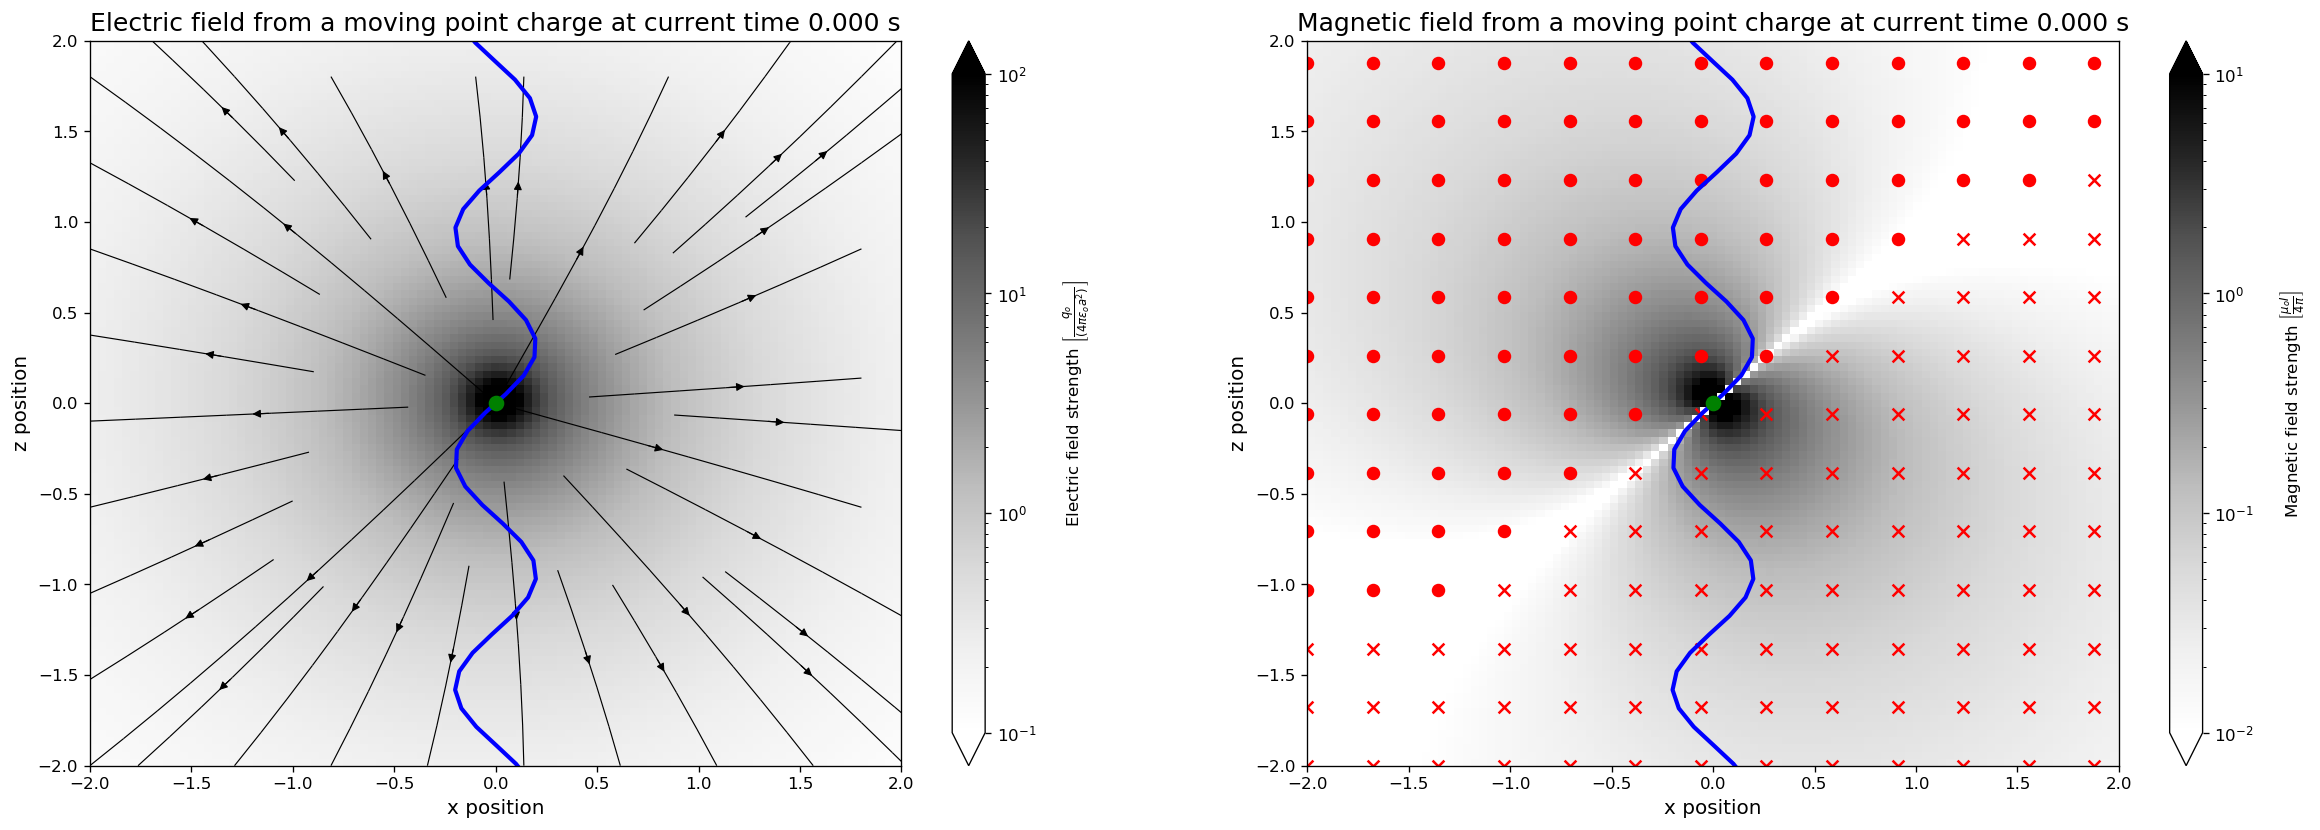

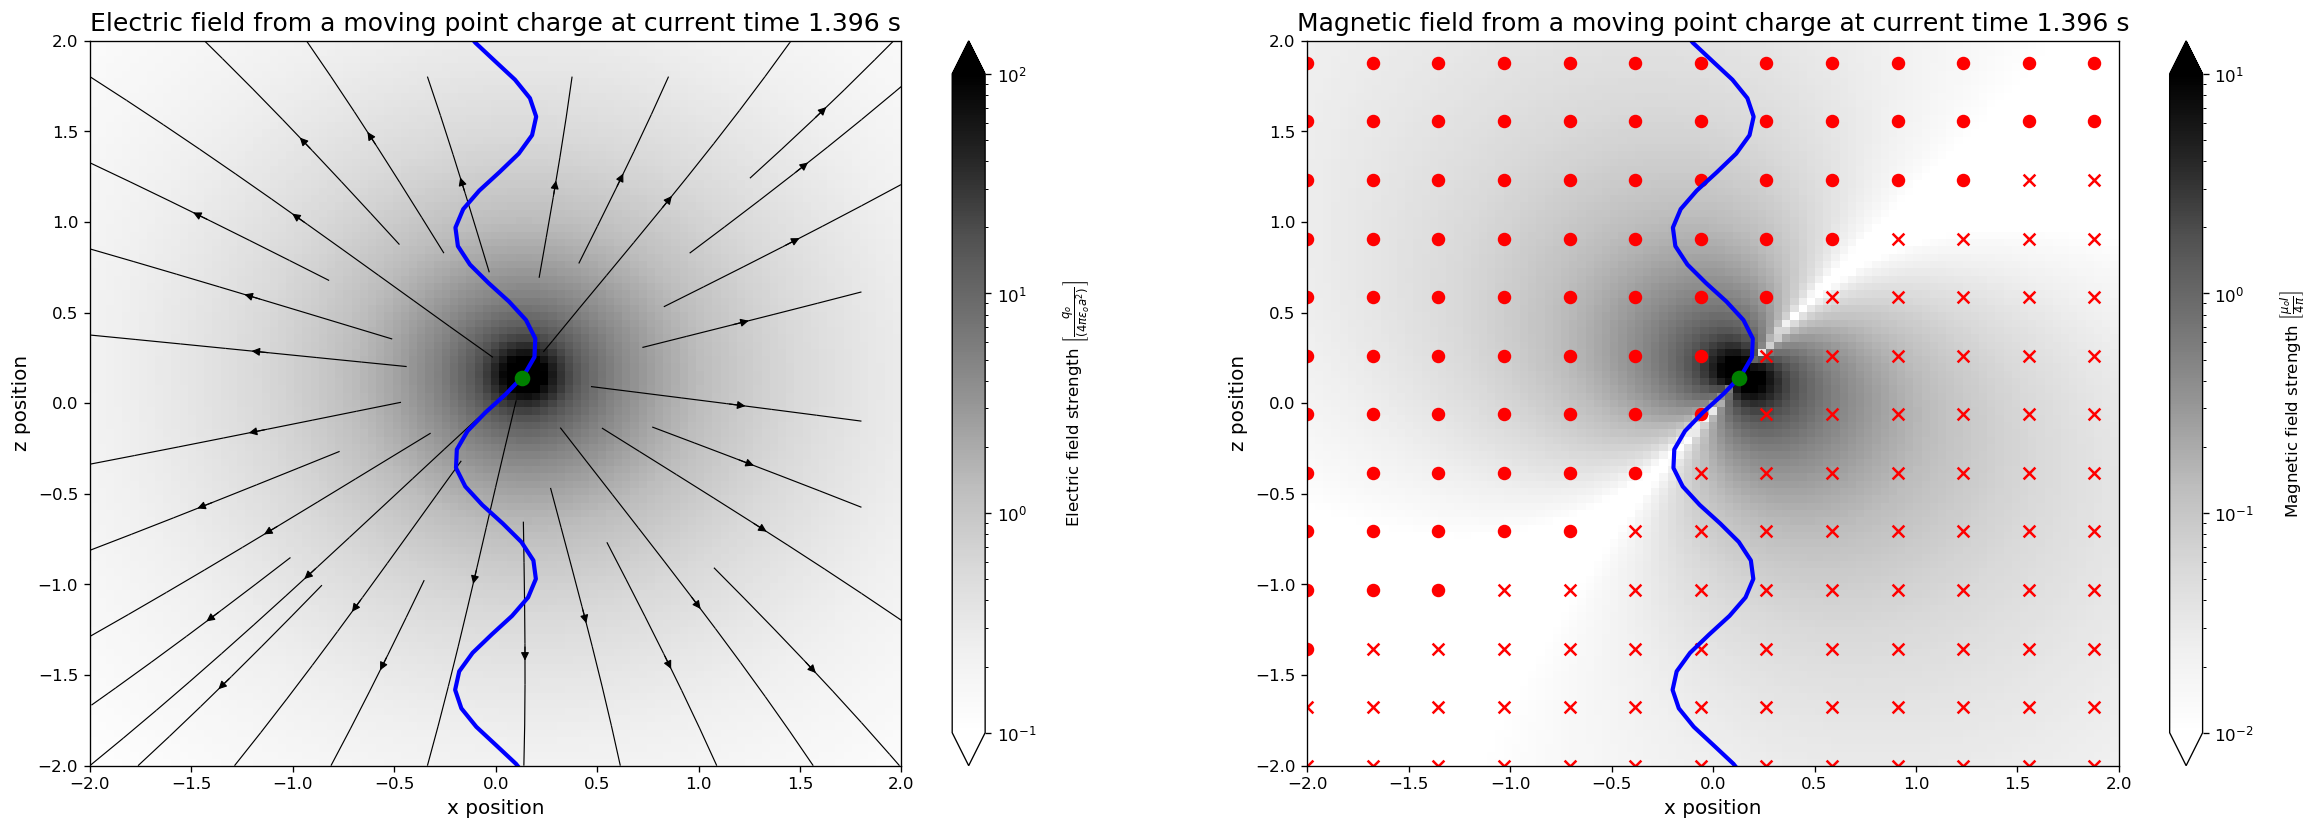

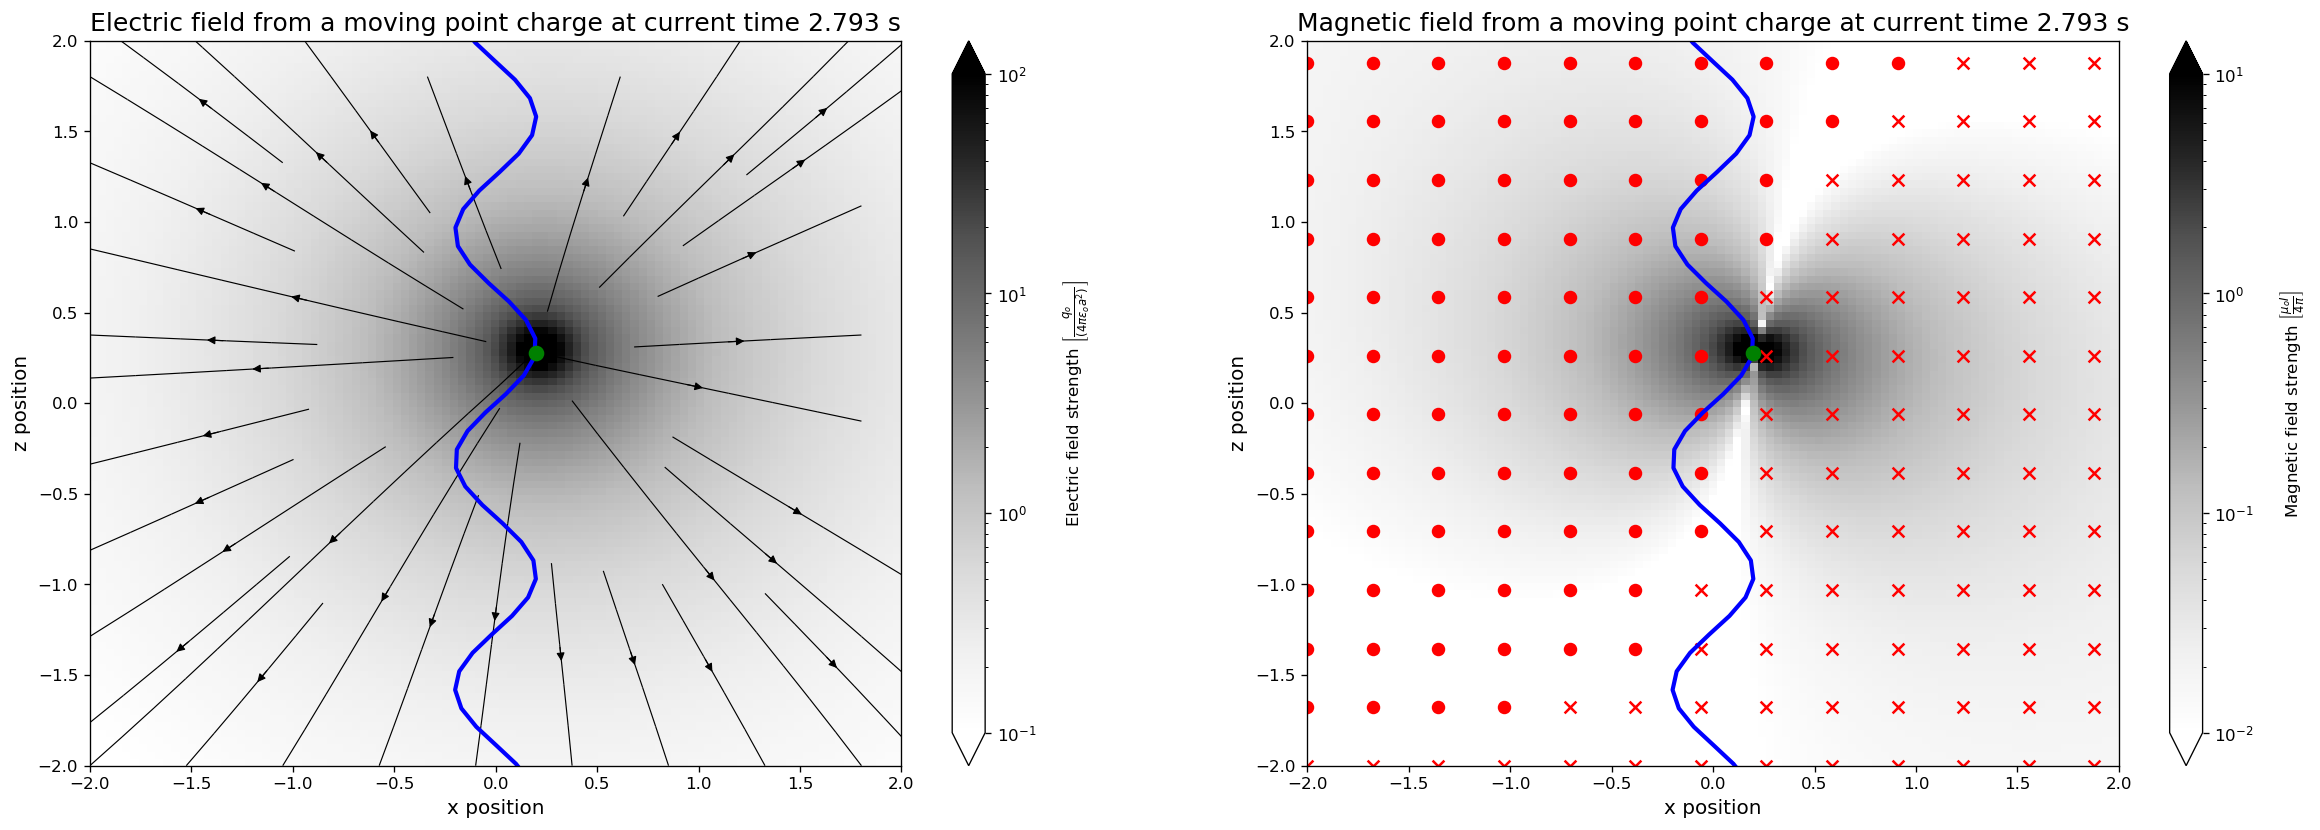

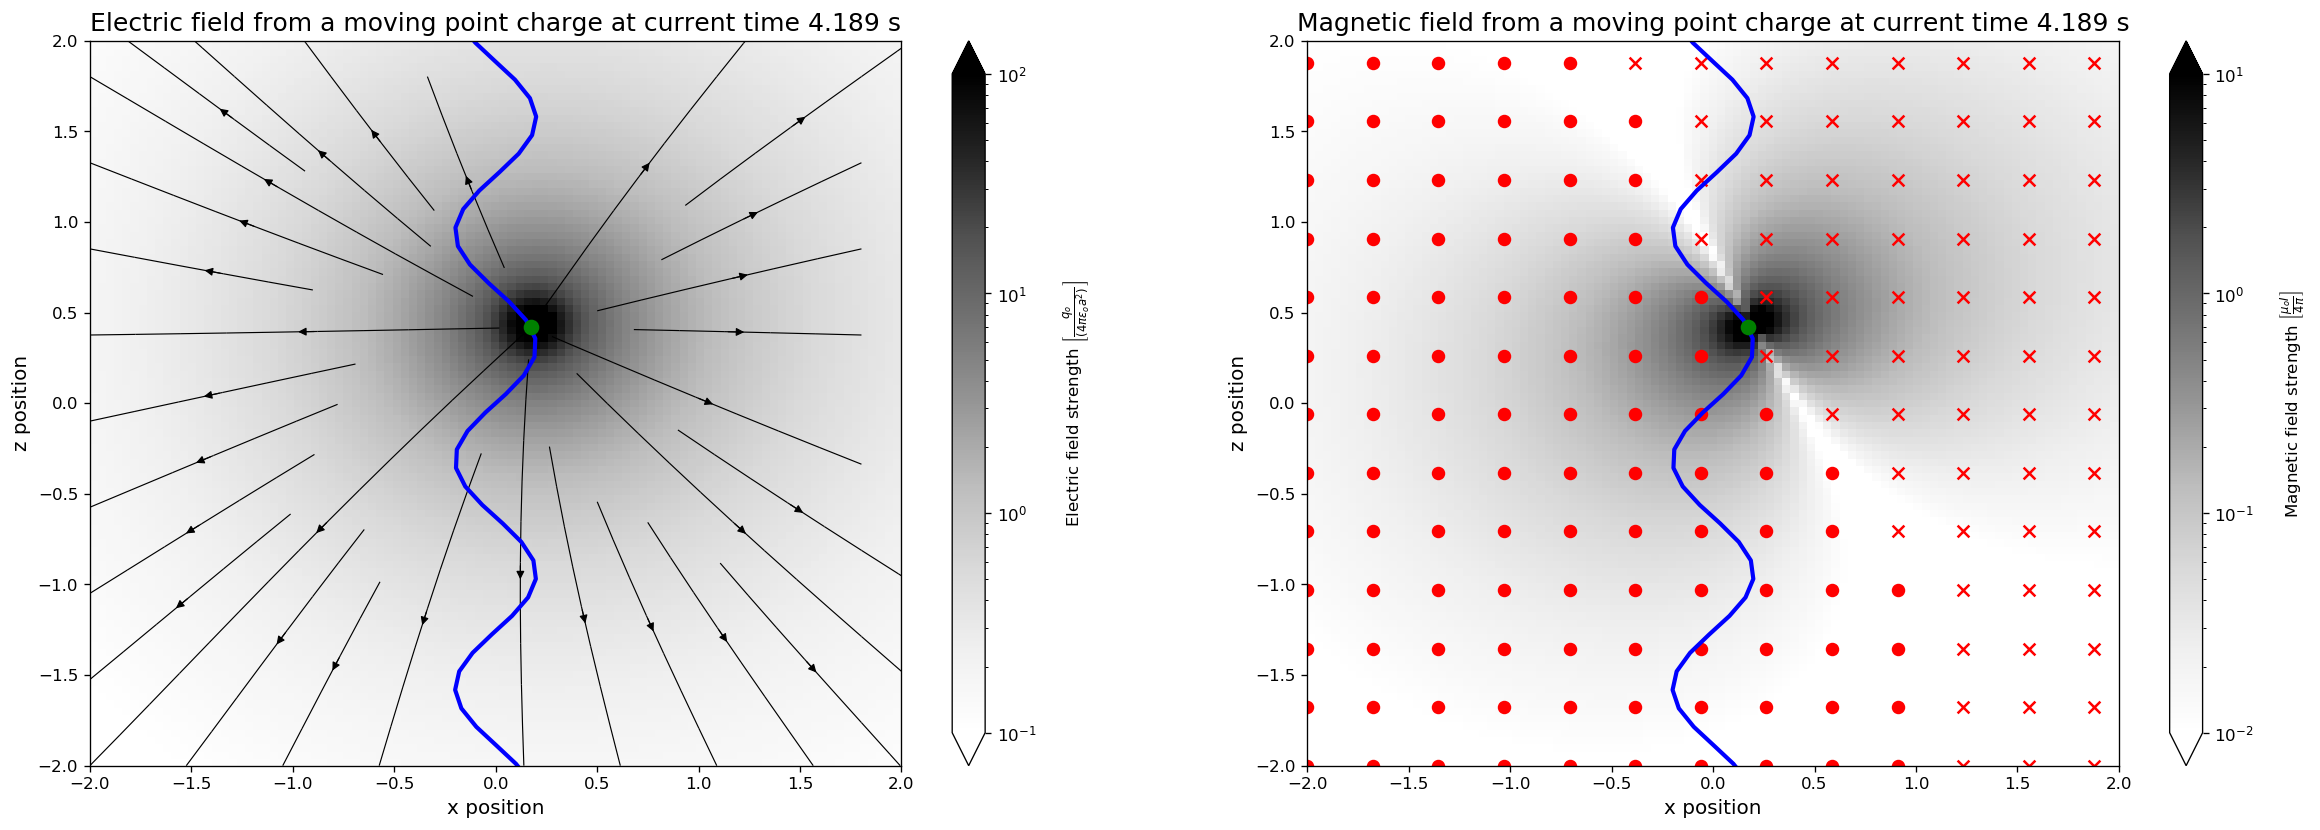

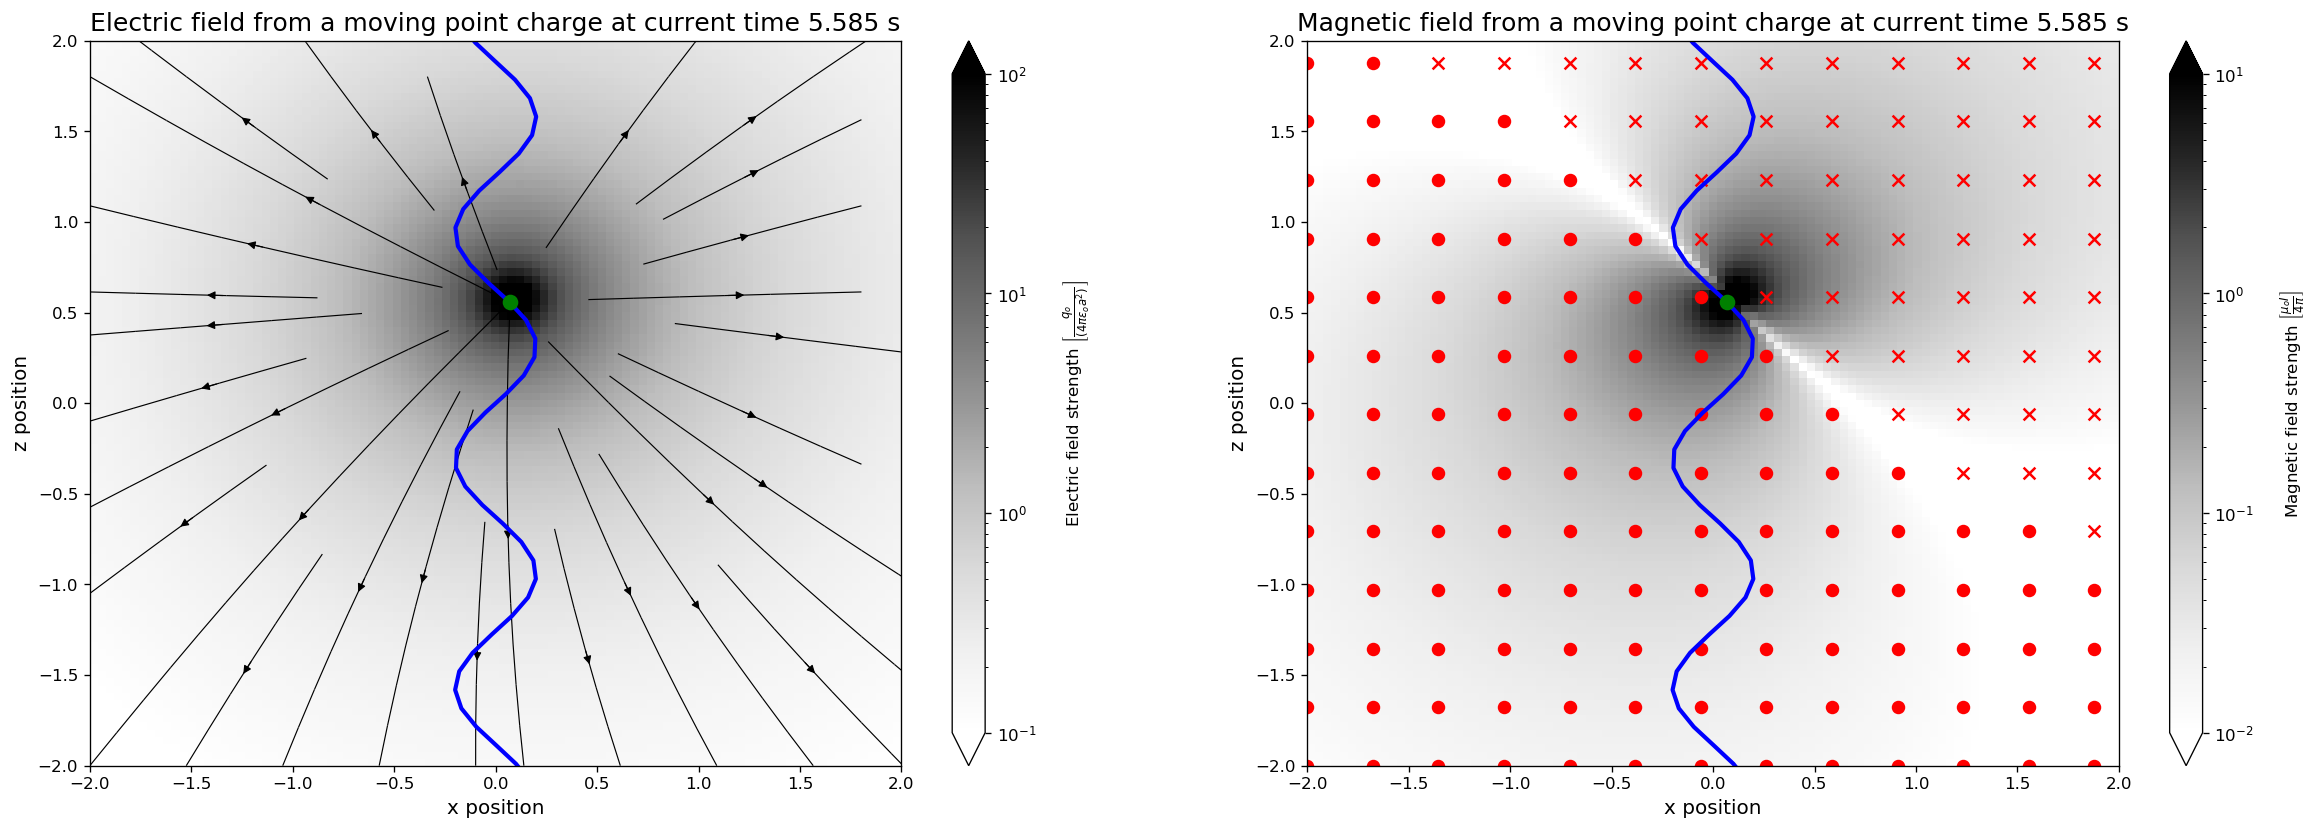

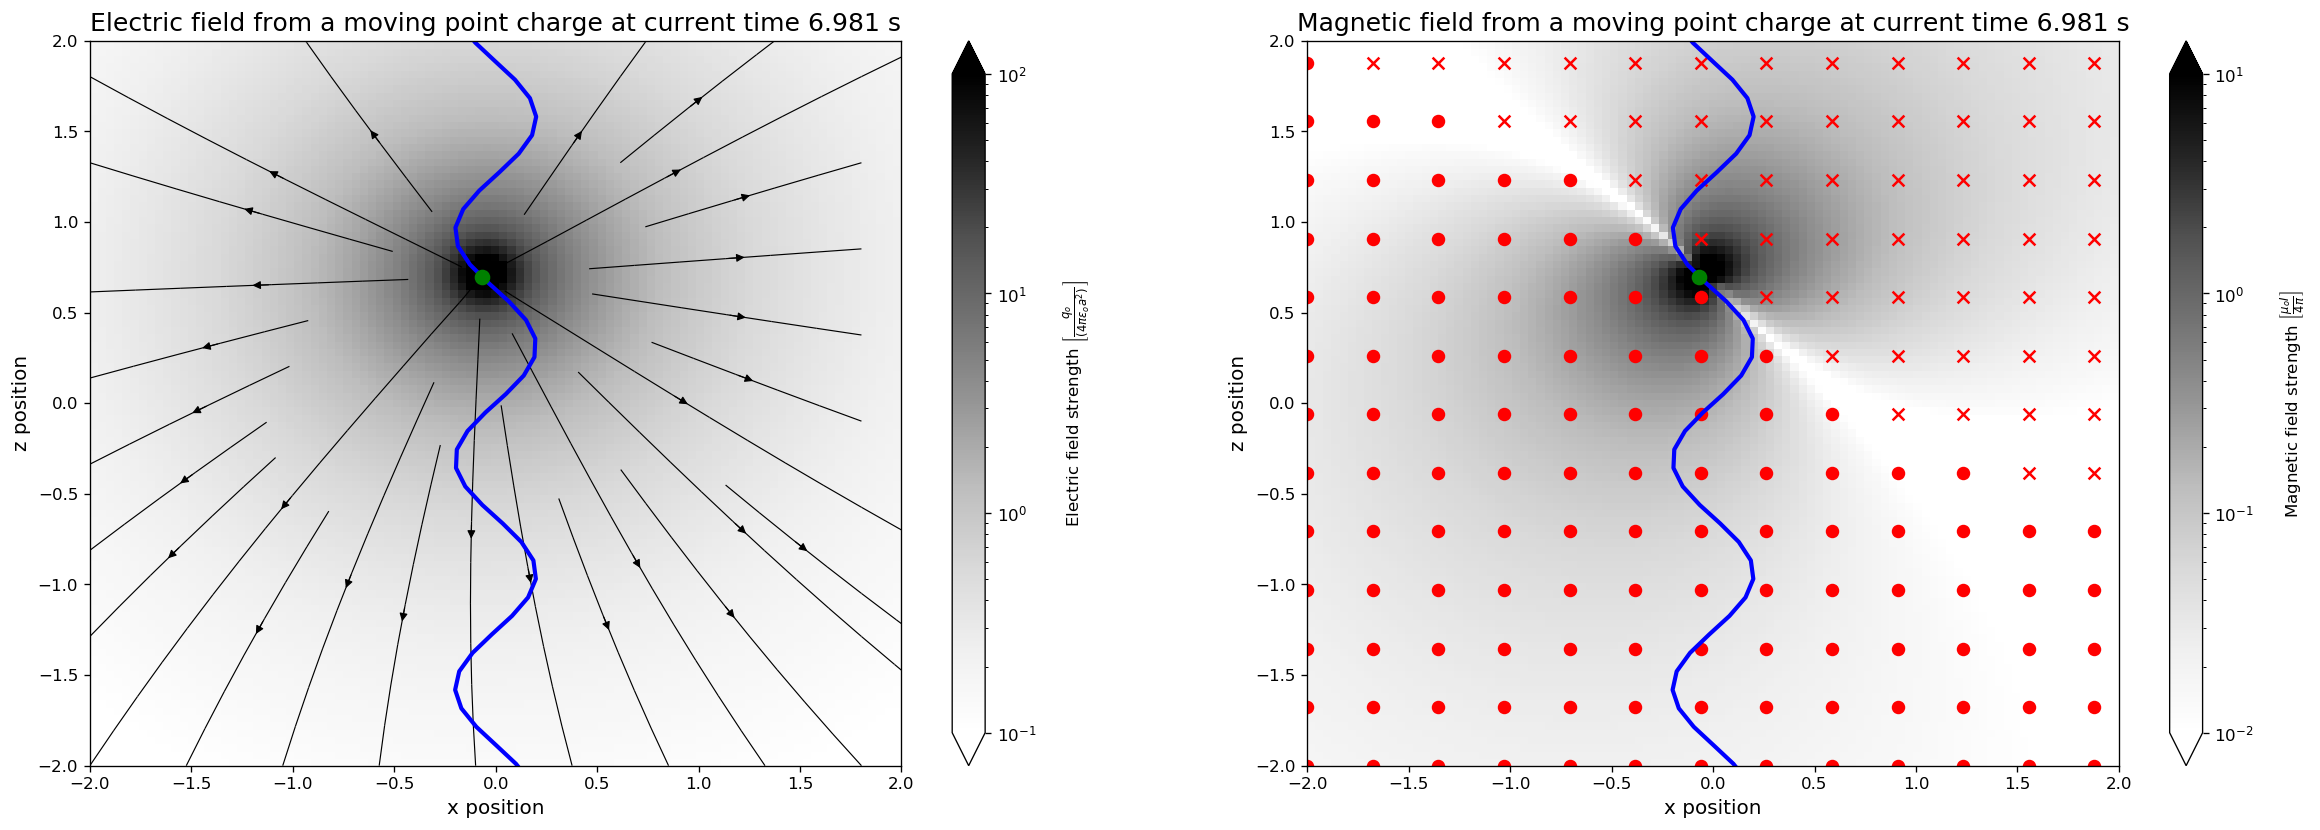

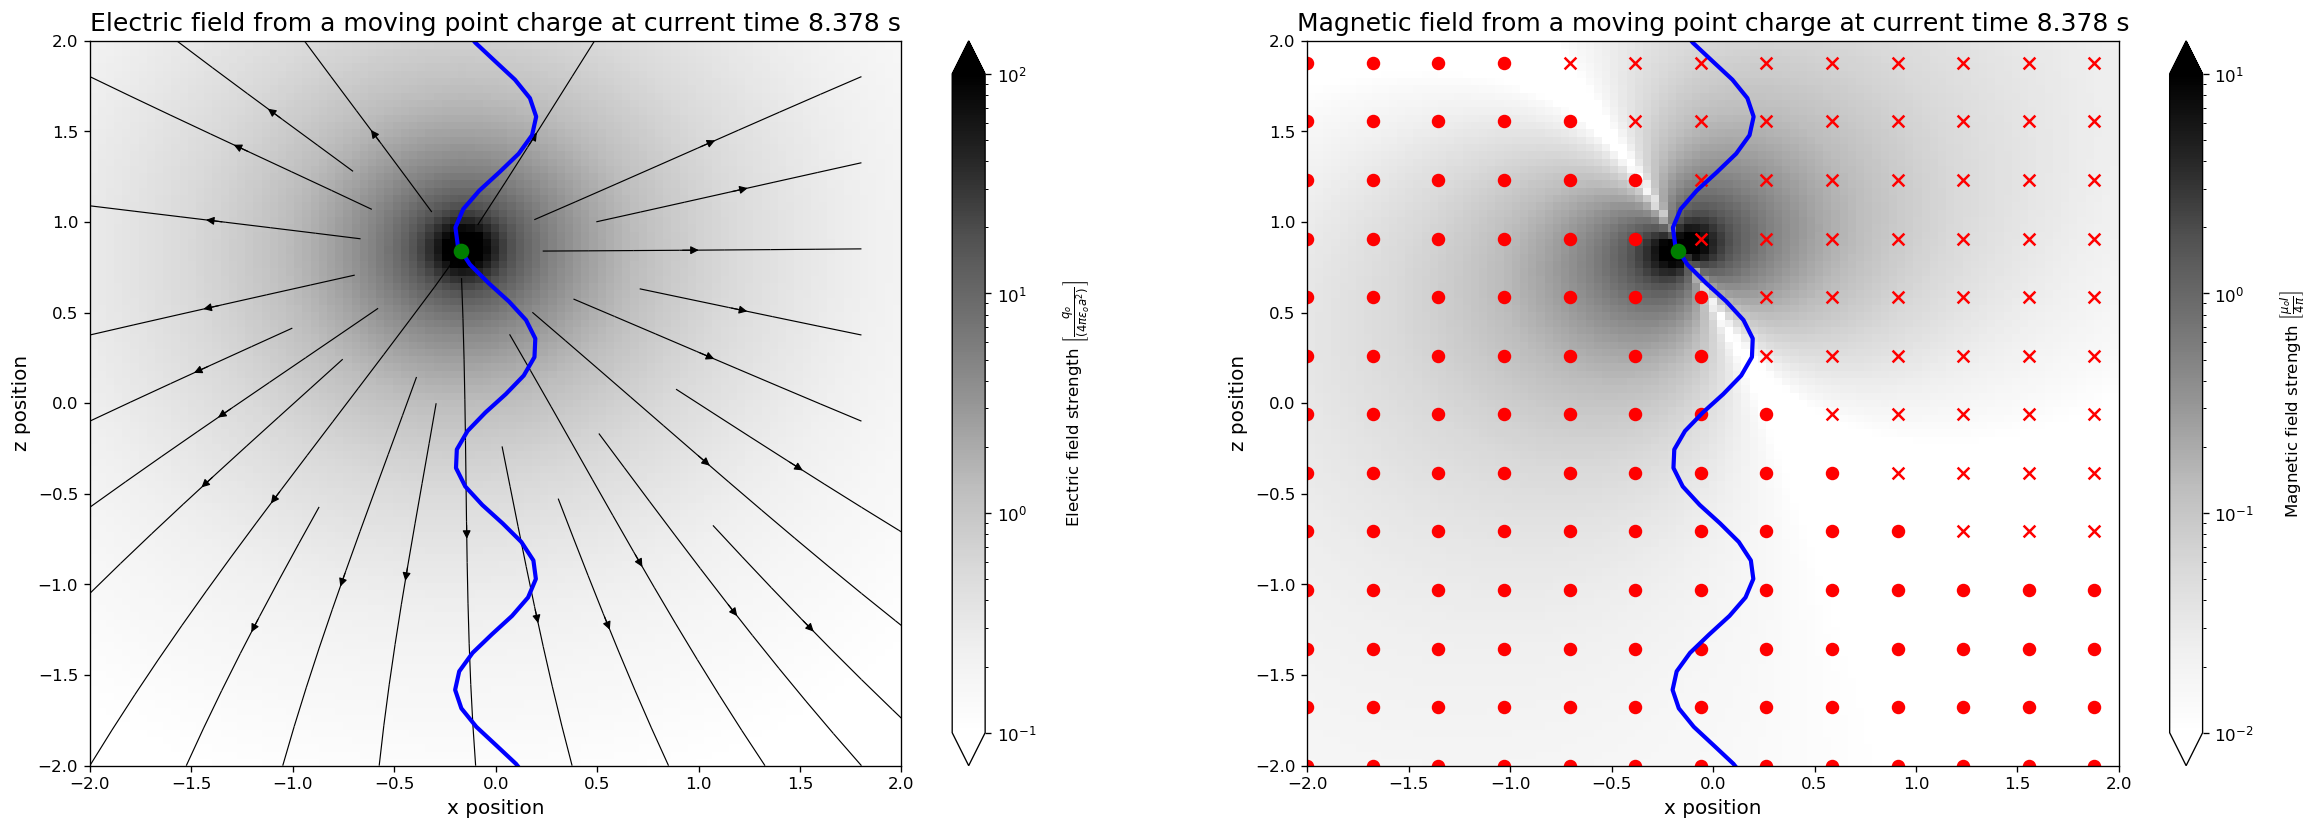

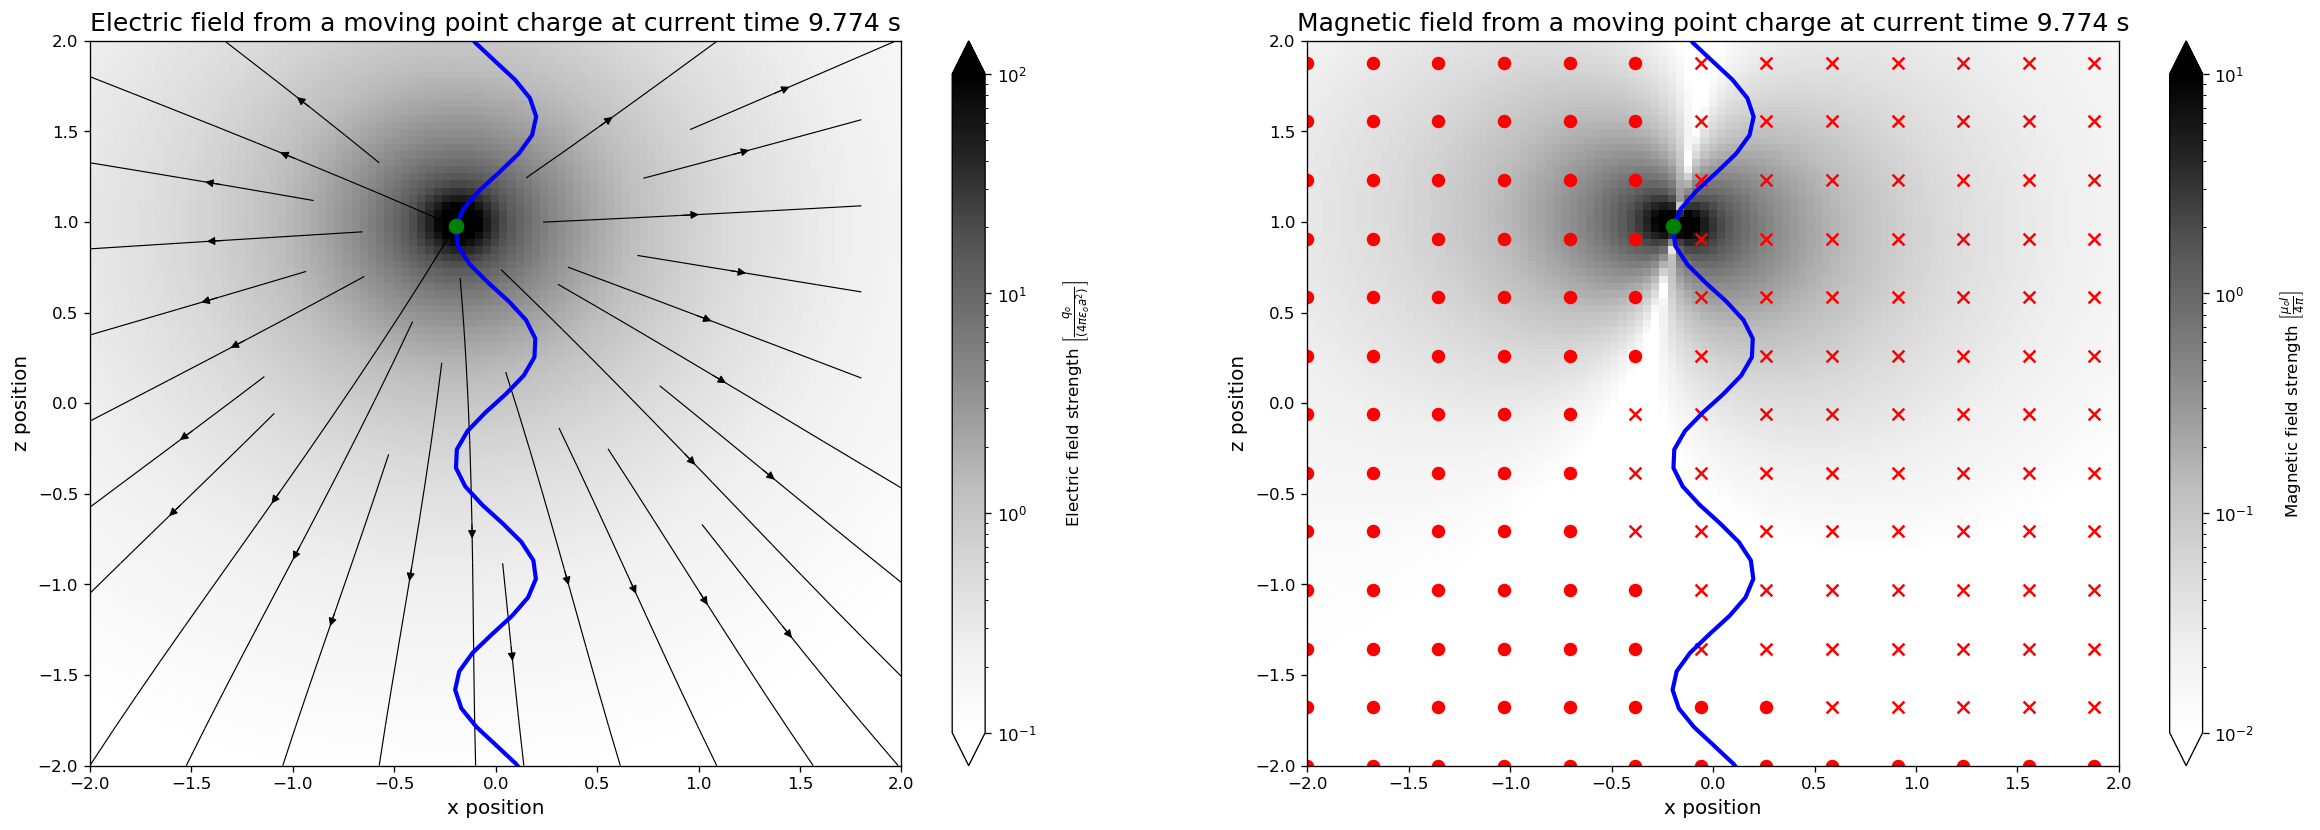

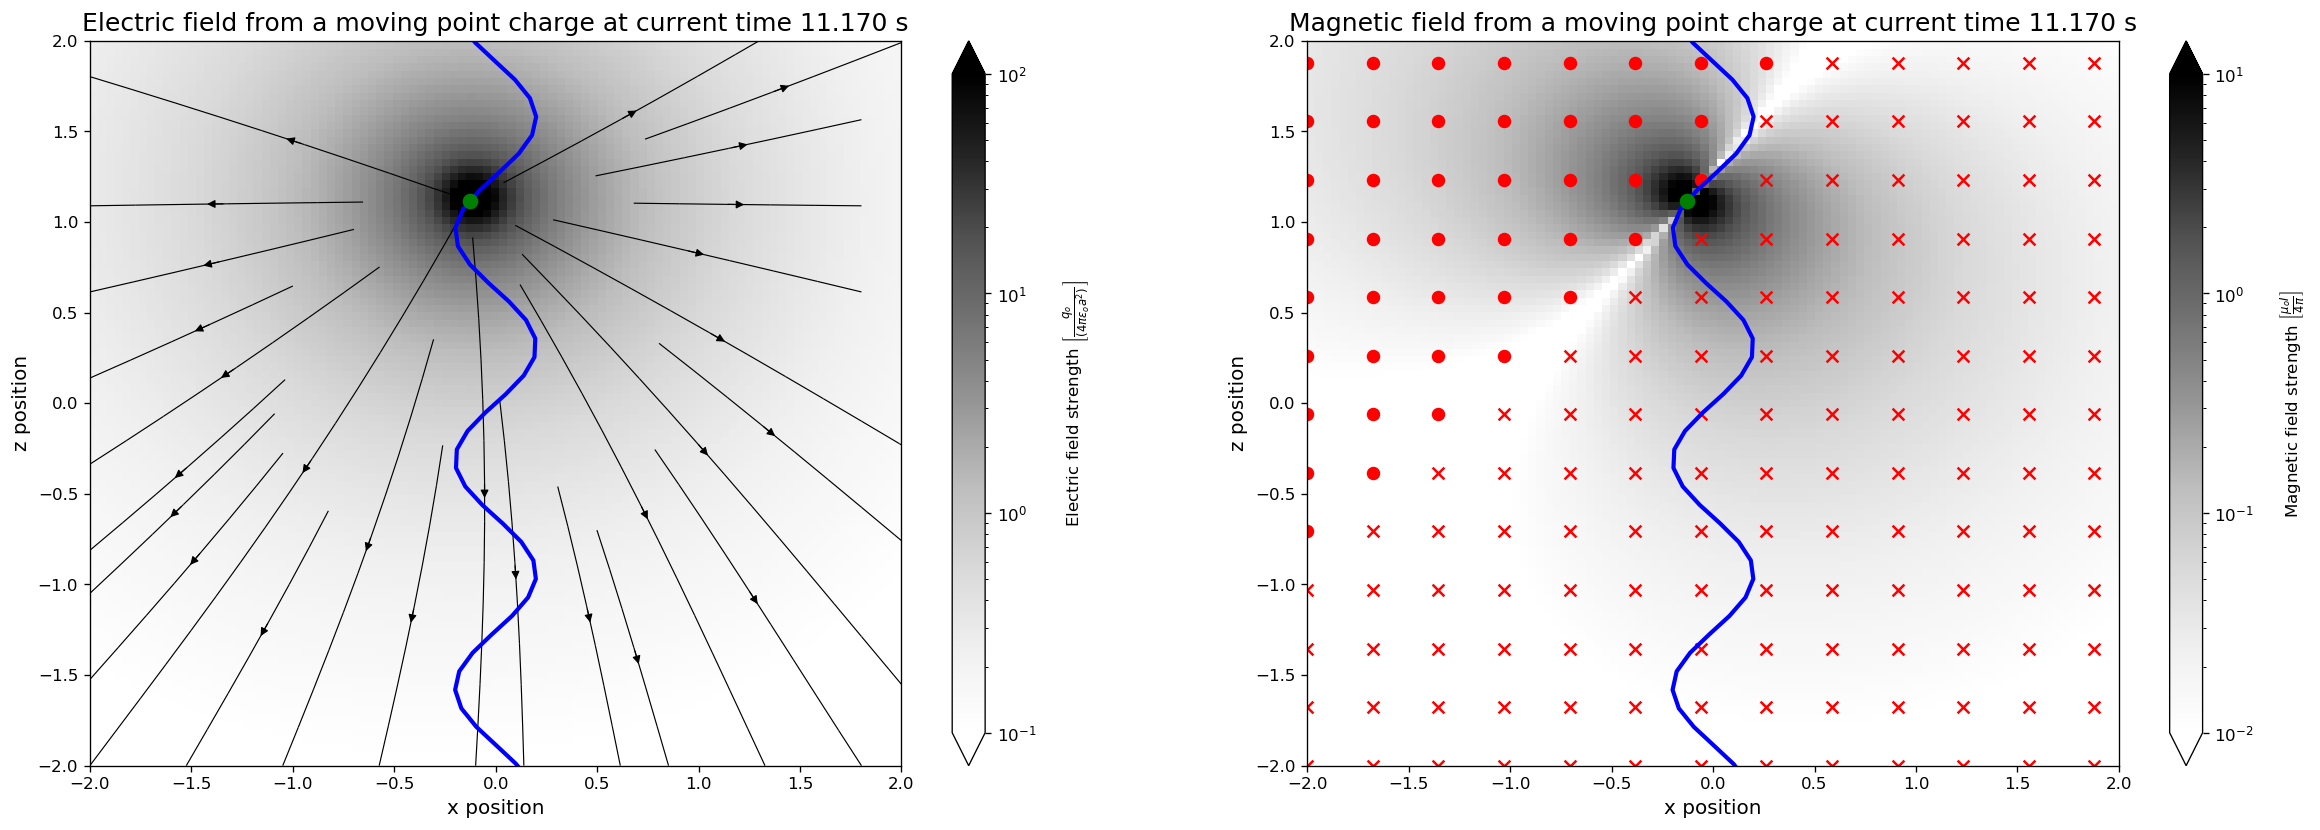

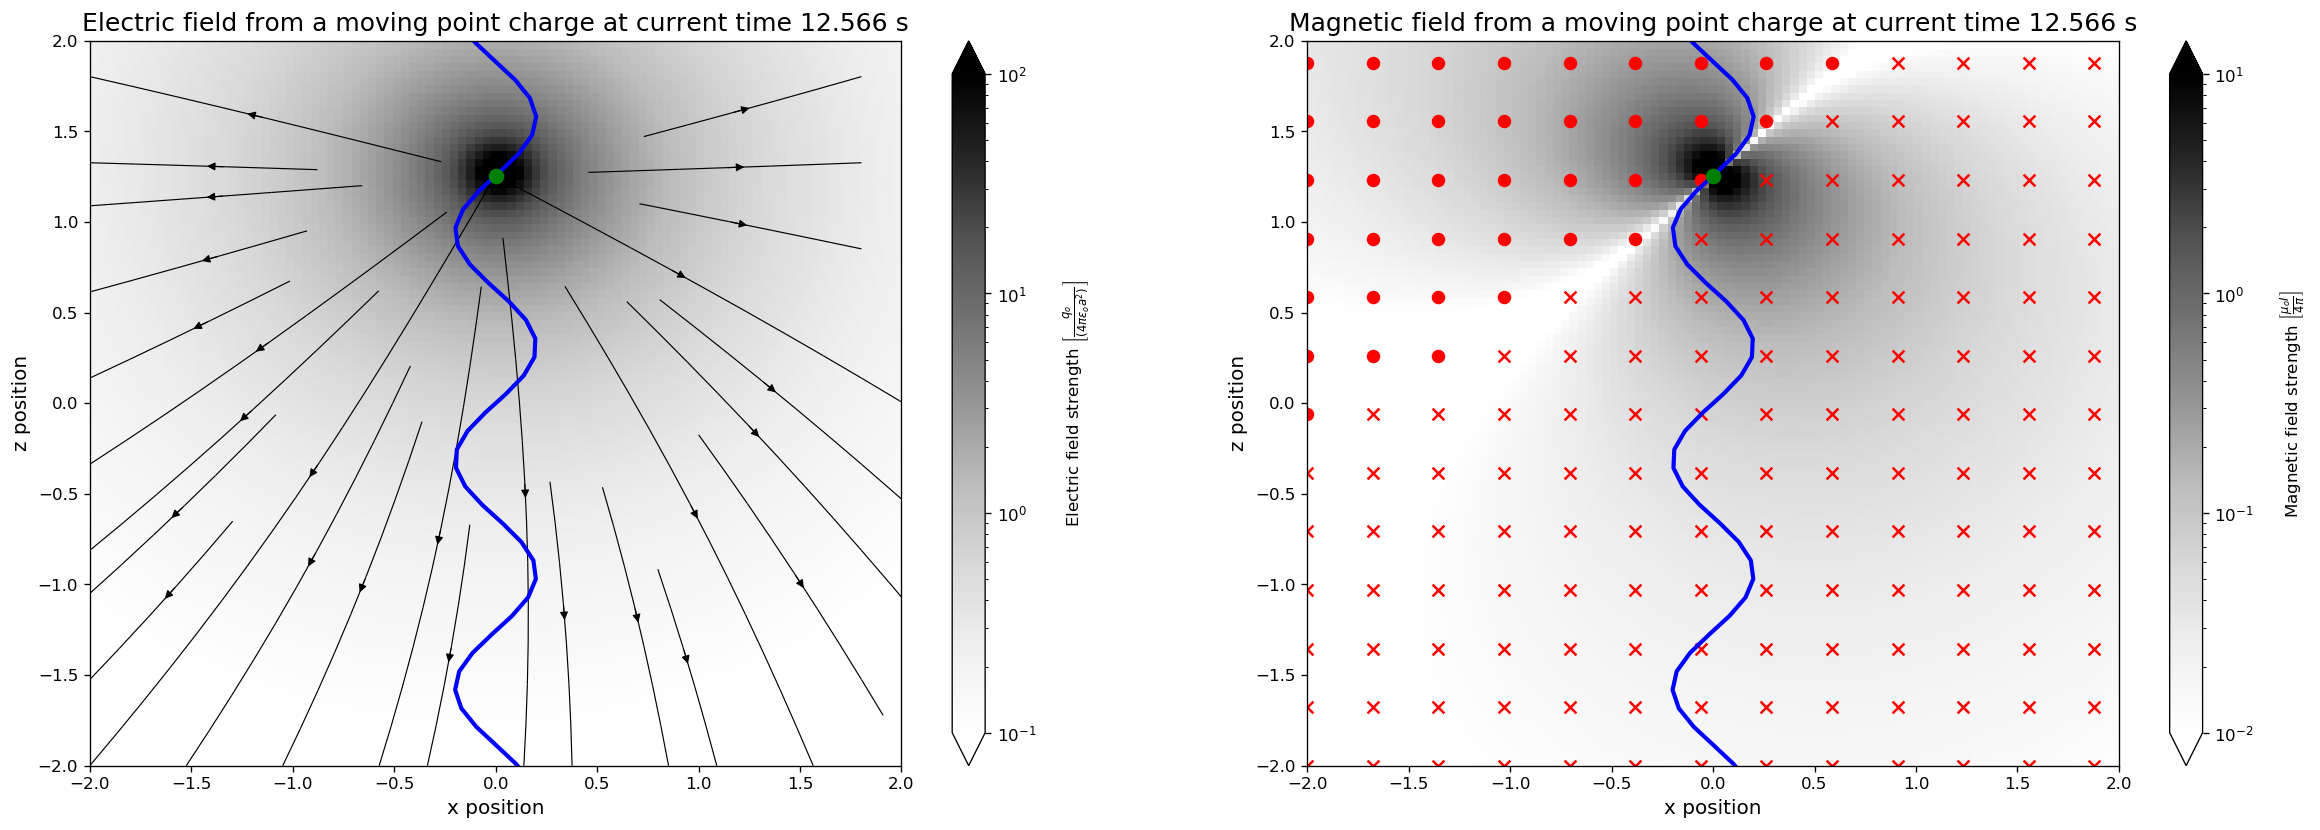

In [24]:
tea = np.linspace(0, 2 * np.pi / omega, 10)
fignum = 1
for timmy in tea:
    xzField(timmy, fignum)
    fignum += 1
# end for

## Propagation of Gaussian Electromagnetic Waves

Use the Finite Difference Time Domain method to solve for $E_z$ and $H_y$ for a Gaussian source located at $x = 0$ in free space. The source should take the form $E_z(0, t) = E_0 e^{ -(t-t_0 ) / \sigma^2}$ . Choose appropriate values of $t_0$ and $\sigma$.

In [25]:
%matplotlib notebook
import sympy as sym
sym.init_printing()
import animatplot as amp

In [26]:
size = 200
imp0 = 377.0
maxTime = 160
t_o = 30.
sig = 10
E0 = 1000

#there is probably a better way to do this, but this is used for the animatplot
x = np.linspace(0, size, size) * 3
time = np.linspace(0, maxTime, maxTime)
X, T = np.meshgrid(x, time)

#initiallizing e and m fields, 2D arrays to store value at each time
ez = np.zeros((maxTime, size))
hy = np.zeros((maxTime, size))

#hardwired source electric field...at all the times
# t = np.arange(maxTime)
# ez[qTime,100] = E0*np.exp(-(t-t_o)**2/sig**2)

#now we calculate each frame
for qTime in range(1, maxTime - 1):

    #update magnetic field
    hy[qTime,
       0:-1] = hy[qTime - 1,
                  0:-1] + (ez[qTime - 1, 1:] - ez[qTime - 1, 0:-1]) / imp0
    #transmission condition
    hy[qTime, -1] = hy[qTime - 1, -2]
    hy[qTime, 0] = hy[qTime - 1, 1]

    #update electric field
    ez[qTime,
       1:] = ez[qTime - 1, 1:] + (hy[qTime, 1:] - hy[qTime, 0:-1]) * imp0
    #transmission condition
    ez[qTime, -1] = ez[qTime - 1, -2]
    ez[qTime, 0] = ez[qTime - 1, 1]

    ez[qTime, 100] = E0 * np.exp(-(qTime - t_o)**2 / sig**2)
# end for

<IPython.core.display.Javascript object>


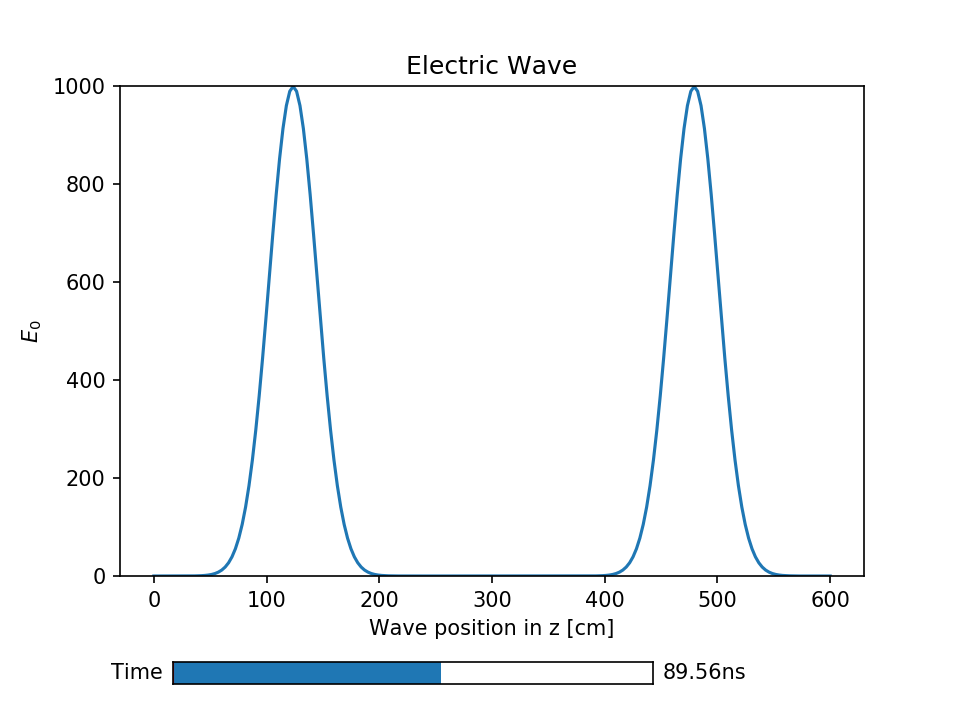

In [27]:
#the Electric wave animation
plt.figure()
timeline = amp.Timeline(time, units='ns', fps=20)
block = amp.blocks.Line(X, ez)
plt.ylim([0, E0])
plt.title('Electric Wave')
plt.xlabel('Wave position in z [cm]')
plt.ylabel(r'$E_0$')
anim = amp.Animation([block], timeline)
anim.timeline_slider()
anim.save_gif('Electric_wave')
plt.show()

<IPython.core.display.Javascript object>


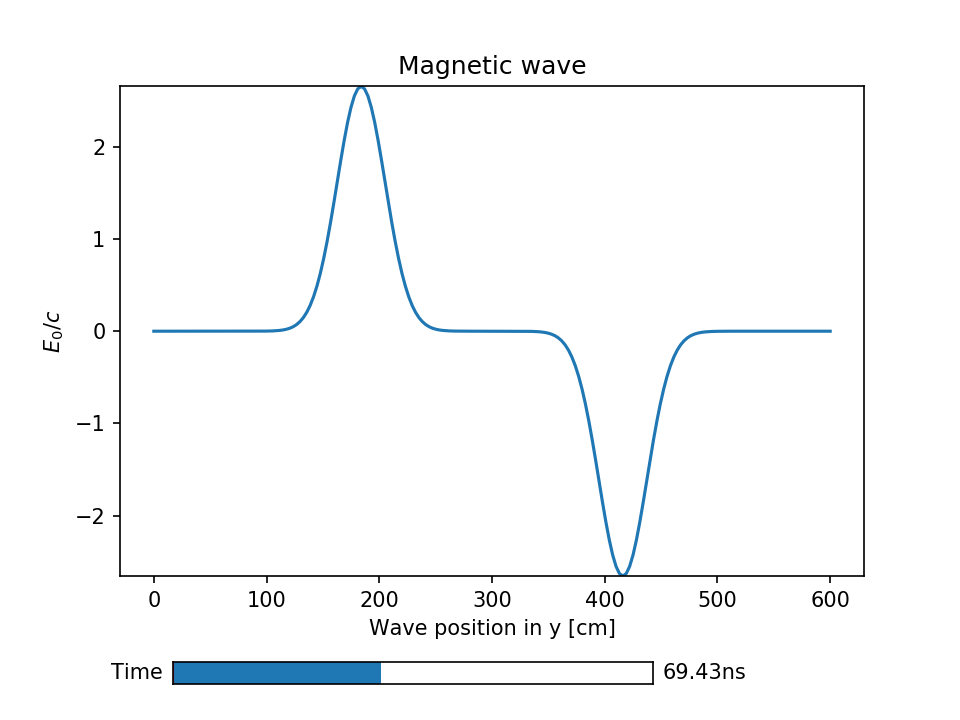

In [28]:
#the Magnetic wave animation
plt.figure()
timeline = amp.Timeline(time, units='ns', fps=20)
b2 = amp.blocks.Line(X, hy)
plt.ylim([-E0 / imp0, E0 / imp0])
plt.title('Magnetic wave')
plt.xlabel('Wave position in y [cm]')
plt.ylabel(r'$E_0/c$')
anim = amp.Animation([b2], timeline)
anim.timeline_slider()  # creates a timeline_slider and a play/pause toggle
anim.save_gif('Magnetic_wave')  # save animation for docs
plt.show()

## Reflection Interference of Electromagnetic Waves

Expand on the previous problem to include fully reflective boundaries a distance of $10\sigma$ from the source location, and a dielectric with $\epsilon_r = 5$. Run the simulation until the wave has reflected off of the bounds of the plot at least twice.

In [29]:
sig = 10
size = 20 * sig
imp0 = 377.0
maxTime = 350
t_o = 30.
E0 = 1

#there is probably a better way to do this, but this is used for the animatplot
x = np.linspace(-size / 2 - 2, size / 2 + 2, size)
time = np.linspace(0, maxTime, maxTime)
X, T = np.meshgrid(x, time)

#initiallizing e and m fields, 2D arrays to store value at each time
ez = np.zeros((maxTime, size))
hy = np.zeros((maxTime, size))

#making dielectric
epsR = np.ones(size)
for a in range(0, size):
    if (a < 30) or (a > 170):
        epsR[a] = 5

#now we calculate each frame
for qTime in range(1, maxTime - 1):

    #update magnetic field
    hy[qTime,
       0:-1] = hy[qTime - 1,
                  0:-1] + (ez[qTime - 1, 1:] - ez[qTime - 1, 0:-1]) / imp0
    #transmission condition
    hy[qTime, -2] = hy[qTime - 1, -1]
    hy[qTime, 1] = hy[qTime - 1, 0]

    #update electric field
    ez[qTime,
       1:] = ez[qTime - 1,
                1:] + (hy[qTime, 1:] - hy[qTime, 0:-1]) * imp0 / epsR[1:]
    #transmission condition
    ez[qTime, -1] = ez[qTime - 1, -2]

    ez[qTime, 100] += E0 * np.exp(-(qTime - t_o)**2 / sig**2)
# end for

<IPython.core.display.Javascript object>


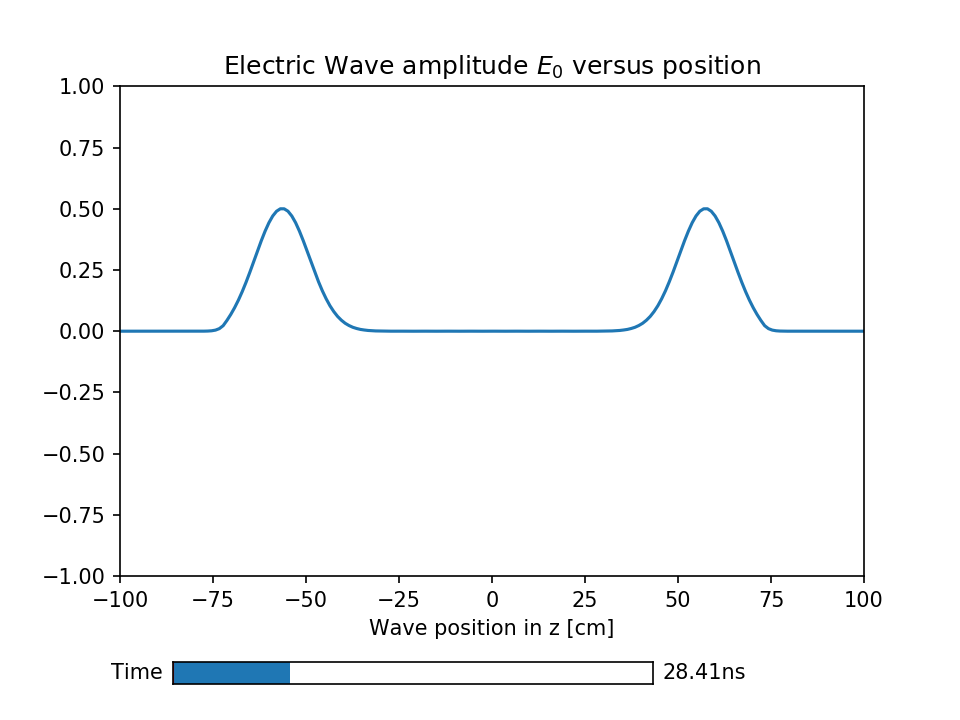

In [30]:
#the Electric wave animation
plt.figure()
timeline = amp.Timeline(time / 3, units='ns', fps=20)
block = amp.blocks.Line(X, ez)
plt.ylim([-E0, E0])
plt.xlim([-size / 2, size / 2])
plt.title('Electric Wave amplitude $E_0$ versus position')
plt.xlabel('Wave position in z [cm]')
anim = amp.Animation([block], timeline)
anim.timeline_slider()
anim.save_gif('Electric_waveA5')
plt.show()

<IPython.core.display.Javascript object>


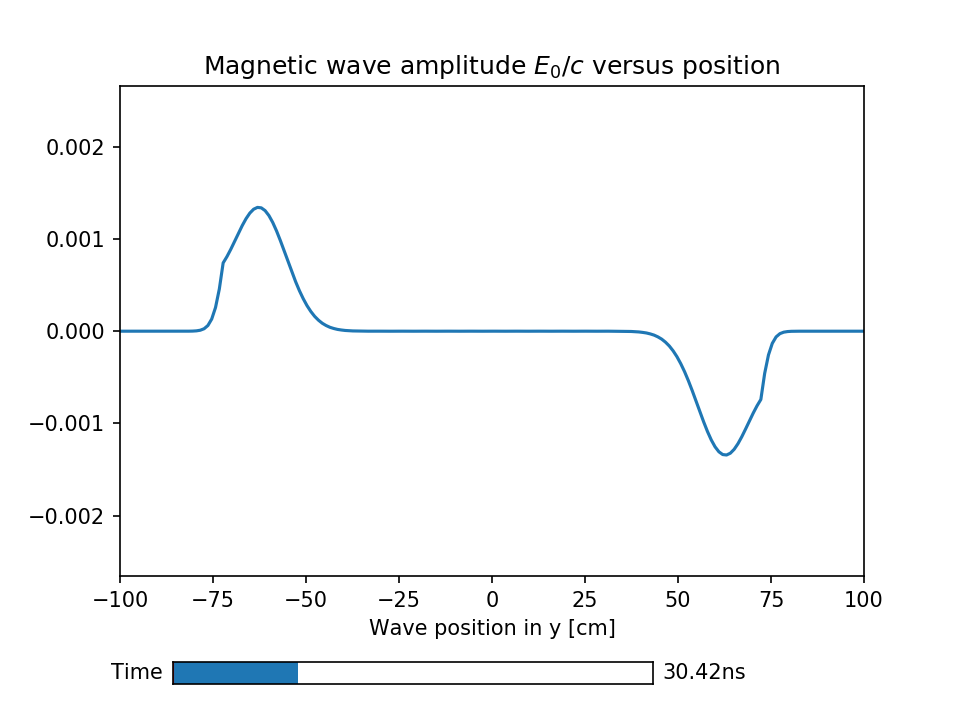

In [31]:
#the Magnetic wave animation
plt.figure()
timeline = amp.Timeline(time / 3, units='ns', fps=20)
b2 = amp.blocks.Line(X, hy)
plt.ylim([-E0 / imp0, E0 / imp0])
plt.xlim([-size / 2, size / 2])
plt.title(r'Magnetic wave amplitude $E_0/c$ versus position')
plt.xlabel('Wave position in y [cm]')
anim = amp.Animation([b2], timeline)
anim.timeline_slider()  # creates a timeline_slider and a play/pause toggle
anim.save_gif('Magnetic_waveA5')  # save animation for docs
plt.show()